In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.stats import binom


In [62]:
df1 = pd.read_csv('comparisons_by_doc_hyp1_1.csv')
#df2 = pd.read_csv('comparisons_by_doc_hyp1_2.csv')
df2 = pd.read_csv('hyp2_comparisons.csv')
#df = pd.concat([df1, df2], axis=1)

In [31]:
df1.head()

,1_0,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_0,2_1,...,24_0,24_1,24_2,24_3,24_4,24_5,24_6,24_7,24_8,24_9
0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
len(df1)

1024

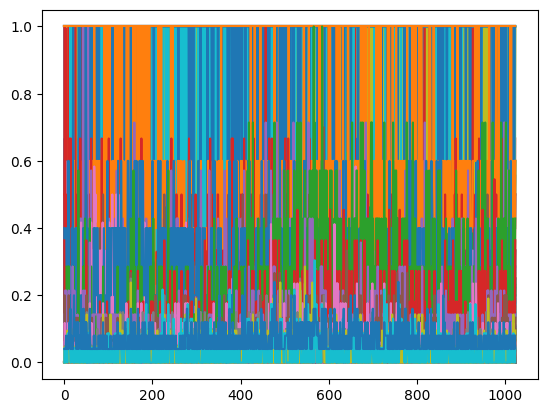

In [28]:
plt.plot(df1)

Text(0.5, 1.0, 'proportion overlap per head')

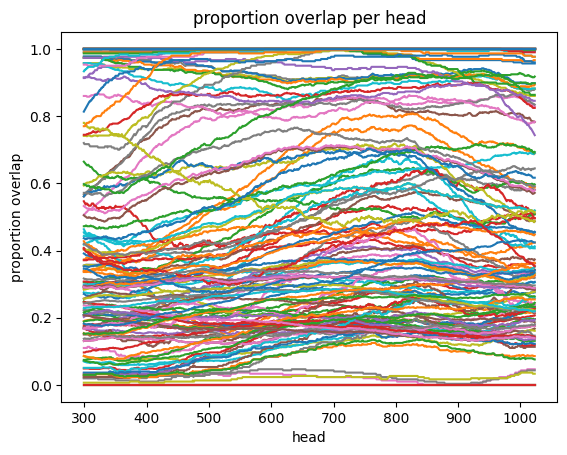

In [27]:
df_rolling = df1.rolling(window=300).mean()

plt.plot(df_rolling)
plt.xlabel("head")
plt.ylabel("proportion overlap")
plt.title("proportion overlap per head")

Text(0.5, 1.0, 'pairwise_correlations')

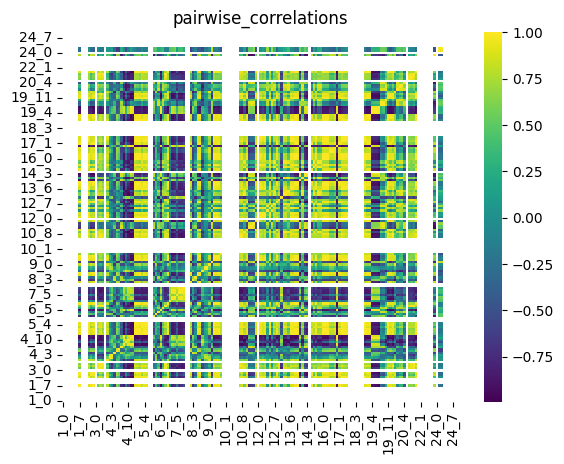

In [41]:
corr_matrix = df_rolling.corr(method='pearson') 
ax = sns.heatmap(corr_matrix, annot=False, cmap='viridis')
ax.invert_yaxis()
ax.set_title('pairwise_correlations')

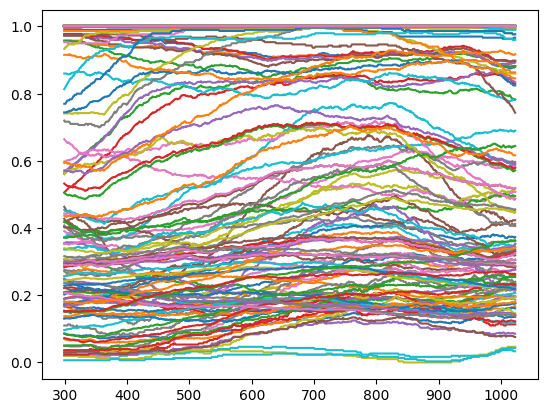

In [39]:
plt.plot(df_rolling_filtered)

In [6]:
#print(corr_matrix.shape)
arr = corr_matrix.to_numpy()

high_corr_pairs = []
for i in (range(len(arr))):
    for j in range(len(arr-i)):
        if arr[i][j] > 0.98:
            high_corr_pairs.append((i, j))


NameError: name 'corr_matrix' is not defined

In [ ]:
high_corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) for (i, j) in high_corr_pairs]

[('1_7', '1_7'), ('1_7', '2_5'), ('1_7', '9_4'), ('1_7', '13_0'), ('1_7', '13_9'), ('1_7', '17_1'), ('2_3', '2_3'), ('2_3', '5_0'), ('2_3', '5_5'), ('2_3', '12_1'), ('2_3', '12_3'), ('2_3', '12_5'), ('2_3', '13_6'), ('2_3', '13_7'), ('2_3', '17_2'), ('2_3', '17_3'), ('2_3', '17_4'), ('2_3', '19_1'), ('2_4', '2_4'), ('2_5', '1_7'), ('2_5', '2_5'), ('2_5', '8_6'), ('2_5', '13_0'), ('2_5', '15_1'), ('2_5', '17_1'), ('3_1', '3_1'), ('3_1', '21_3'), ('3_2', '3_2'), ('3_3', '3_3'), ('3_3', '7_0'), ('3_3', '21_3'), ('4_1', '4_1'), ('4_2', '4_2'), ('4_3', '4_3'), ('4_4', '4_4'), ('4_5', '4_5'), ('4_6', '4_6'), ('4_7', '4_7'), ('4_8', '4_8'), ('4_8', '4_12'), ('4_9', '4_9'), ('4_10', '4_10'), ('4_11', '4_11'), ('4_12', '4_8'), ('4_12', '4_12'), ('5_0', '2_3'), ('5_0', '5_0'), ('5_0', '5_1'), ('5_0', '5_4'), ('5_0', '5_5'), ('5_0', '9_2'), ('5_0', '13_6'), ('5_0', '16_0'), ('5_0', '16_1'), ('5_0', '16_2'), ('5_0', '17_2'), ('5_0', '17_3'), ('5_0', '19_1'), ('5_0', '19_11'), ('5_1', '5_0'), ('5_1

In [ ]:
high_corr_df = df_rolling
#high_corr_cols = sum([[i] + [j] for i, j in (high_corr_pairs)], [])
for pair in high_corr_pairs:
    high_corr_df = df_rolling[[pair[0], pair[1]]]
    plt.figure()
    plt.plot(high_corr_df)

In [45]:
def group_highly_correlated(df, threshold=0.9):

    corr_matrix = df.corr().abs()
    groups = []
    remaining_features = set(corr_matrix.columns)
    
    while remaining_features:
        feature = remaining_features.pop()
        highly_correlated = set(corr_matrix[feature][corr_matrix[feature] > threshold].index)
    
        current_group = highly_correlated.intersection(remaining_features)
        groups.append(df[list(highly_correlated)])
        remaining_features -= current_group

    return groups

In [121]:
def group_by_doc(df):
    groups = []
    idx = 0
    for column in df.columns[1:]:
        group = [df.columns[0]]
        while column.split("_")[0] == group[-1].split("_")[0]:
            group.append(column)
        groups.append(group)
        idx += len(group)
        if idx < len(df.columns):
            group = [df.columns[idx]]
    return groups

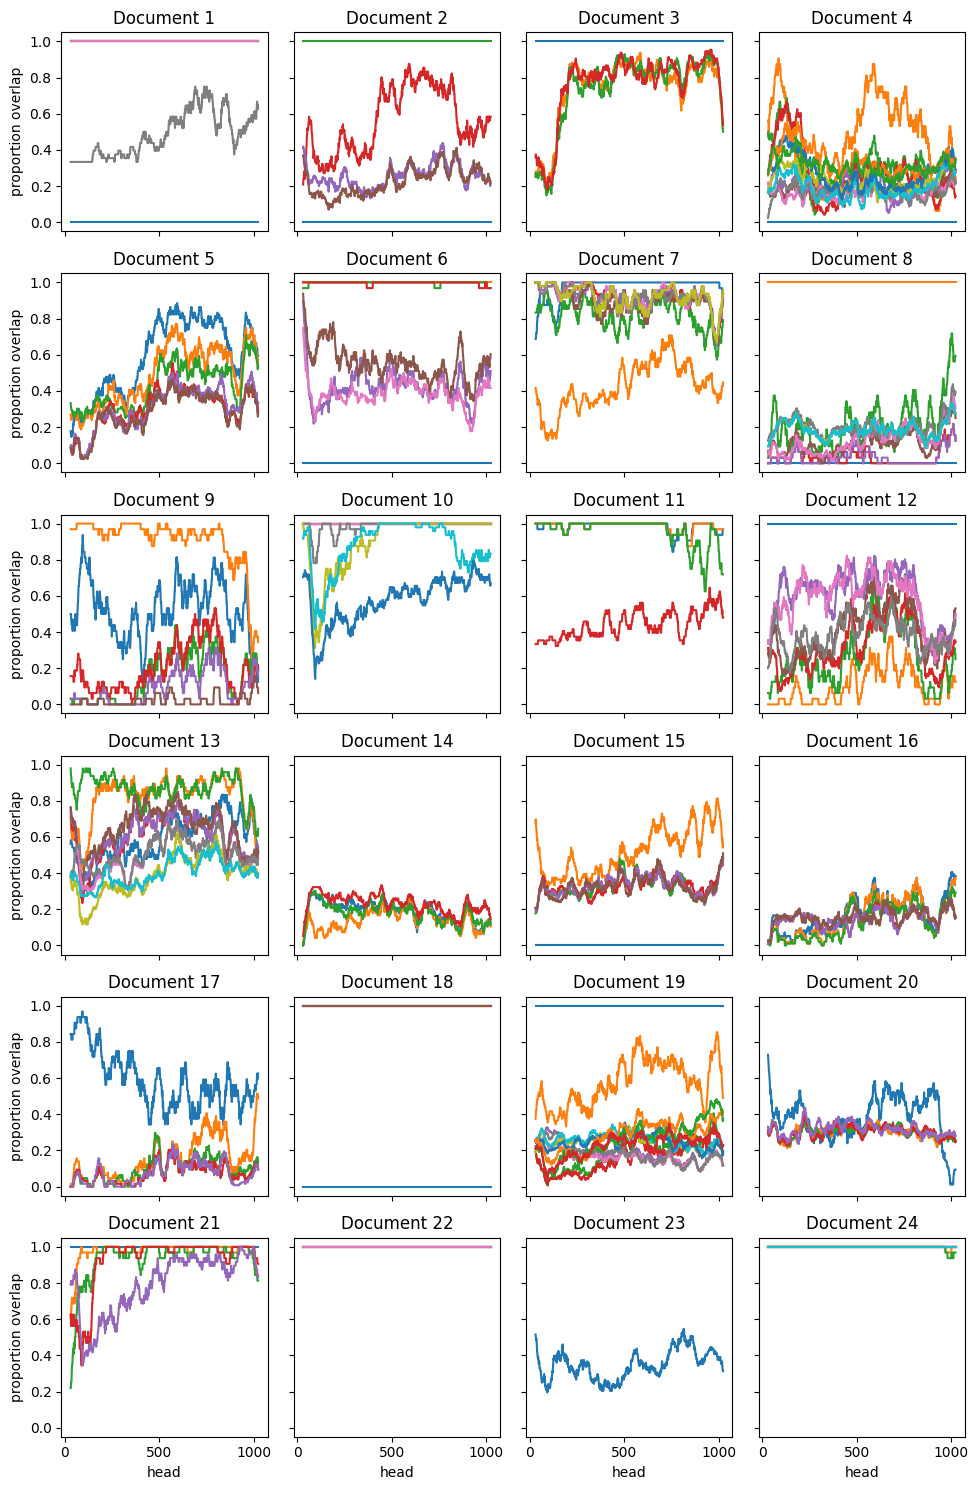

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(10, 15), sharex=True, sharey=True)

axes = axes.flatten()

for i in range(1, 25):
    group = []
    for col in df1.columns:
        if col.split("_")[0] == str(i):
            group.append(col)

    ax = axes[i-1]
    df1.drop()
    df1.rolling(window=32).mean()[group].plot(ax=ax, legend=False)
    ax.set_xlabel('head')
    ax.set_ylabel('proportion overlap')
    ax.set_title(f'Document {i}')
    #ax.get_legend().remove()


plt.tight_layout()
plt.show()

146


/var/folders/62/h8jr8pyd5md5b5n_hsp2z0200000gr/T/ipykernel_16293/1968126584.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


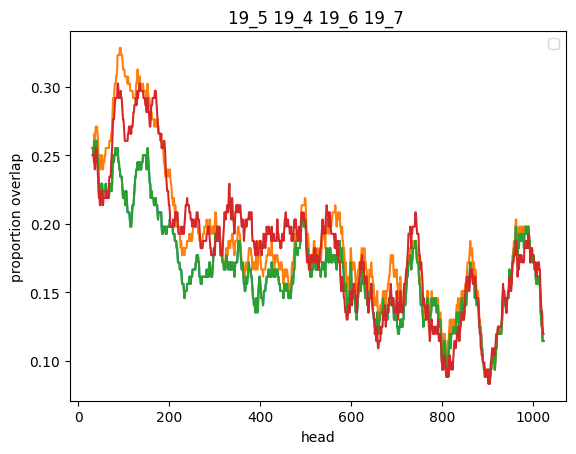

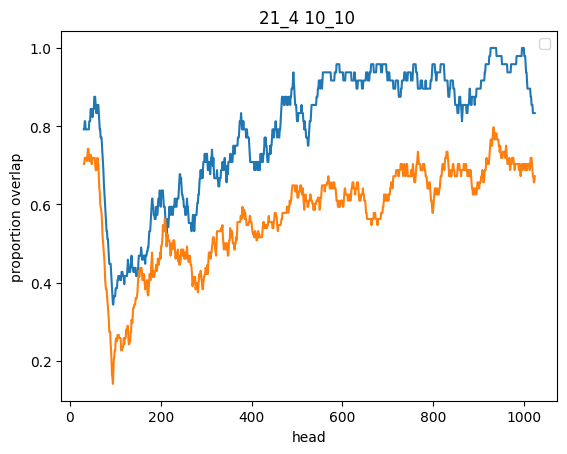

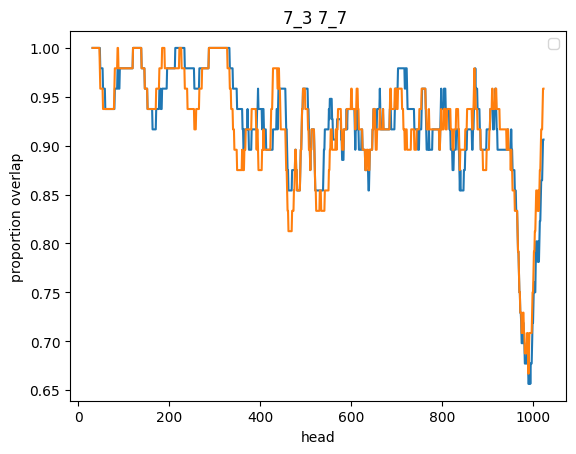

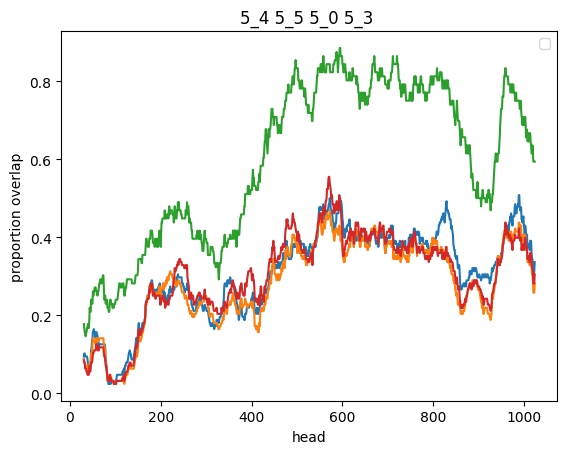

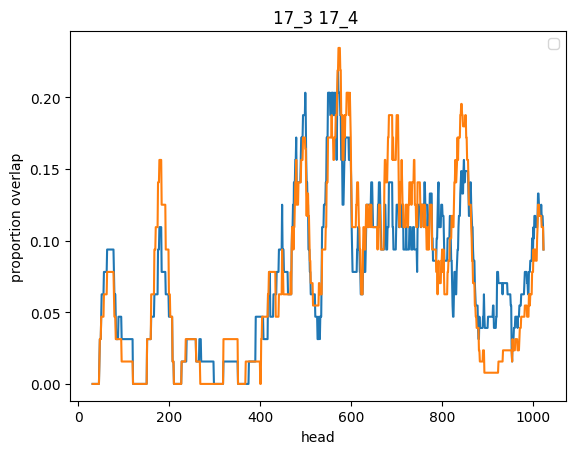

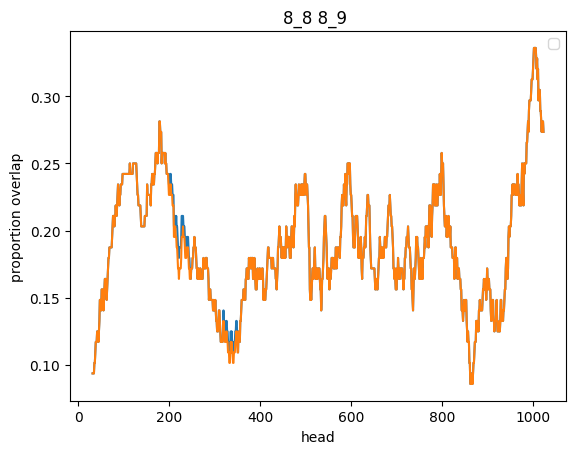

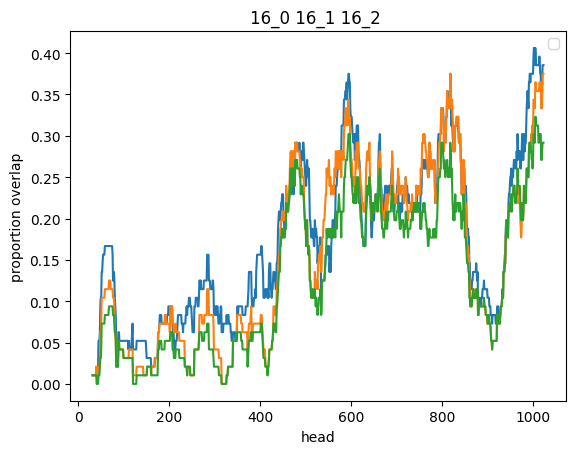

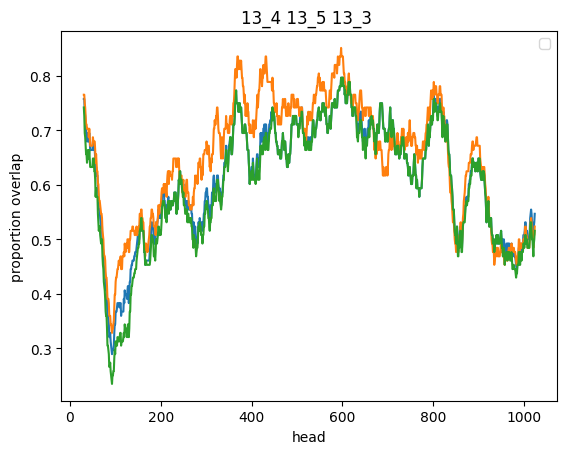

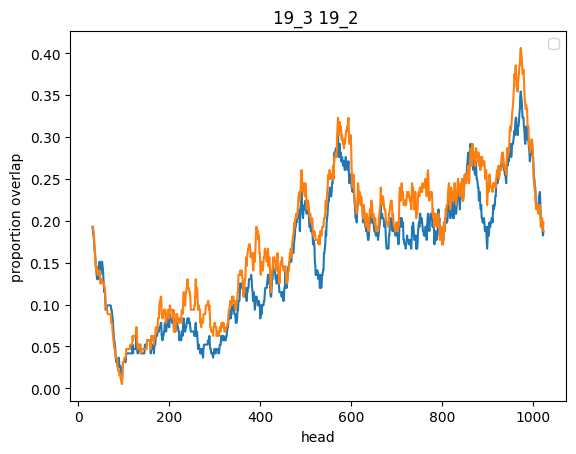

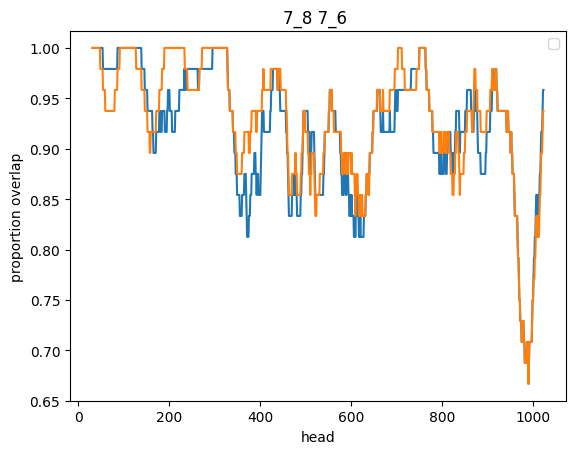

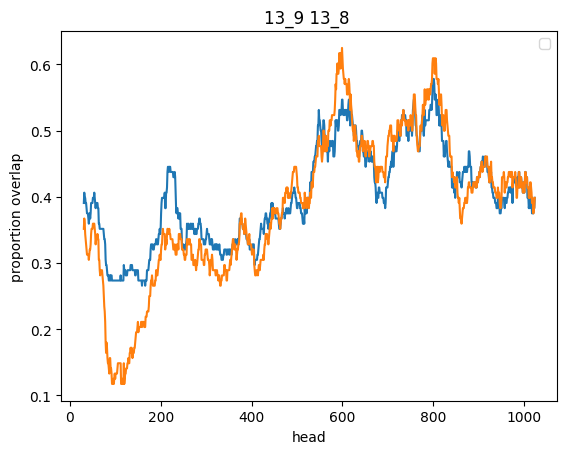

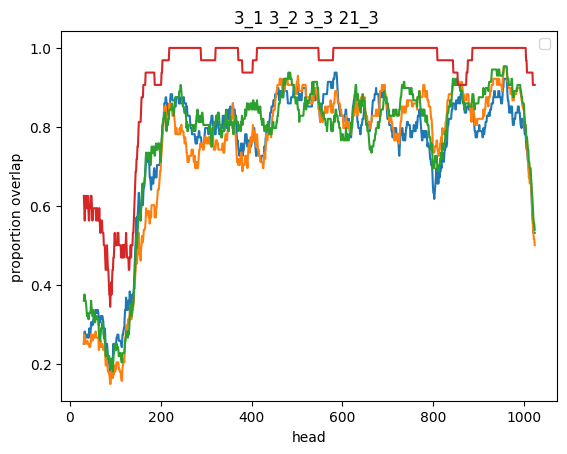

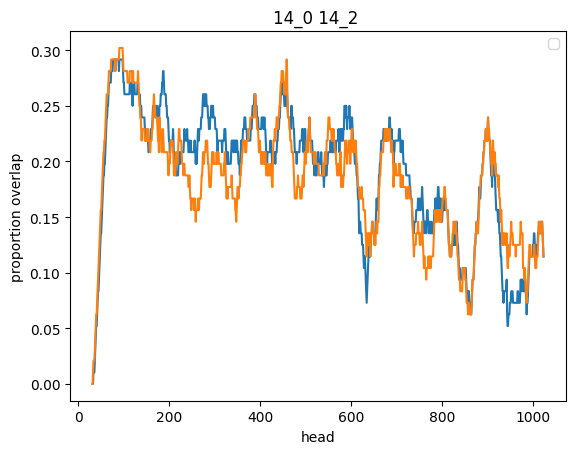

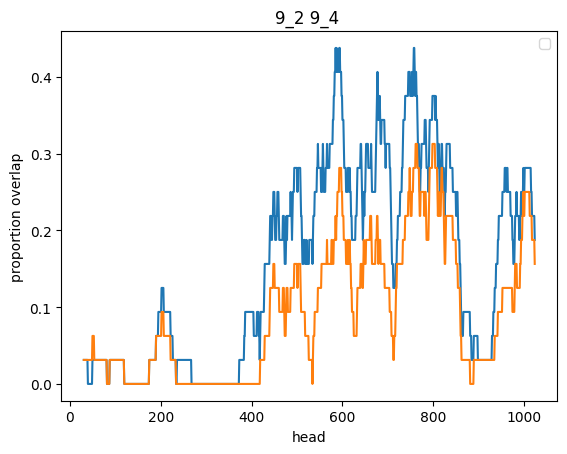

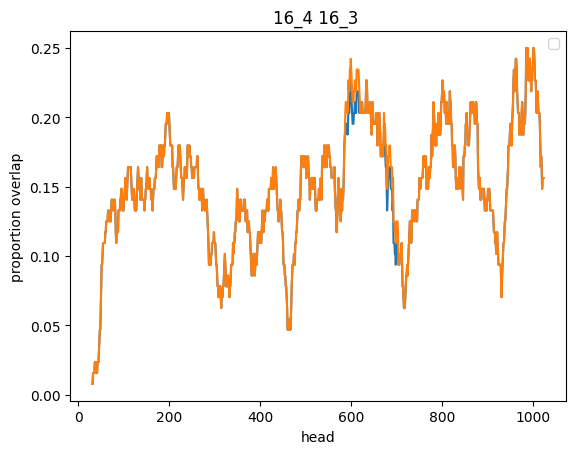

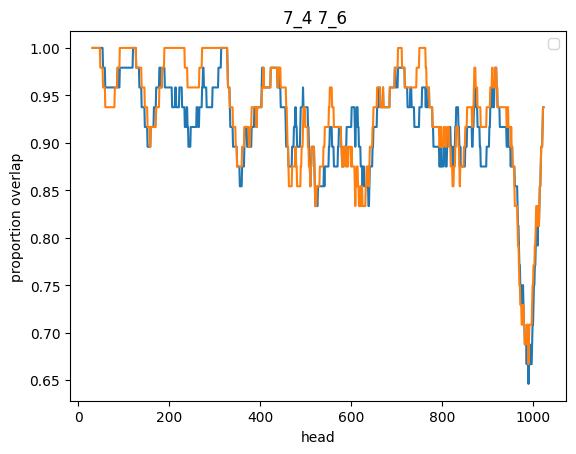

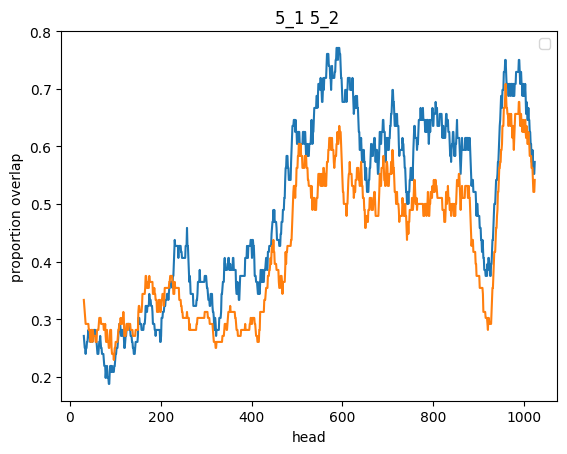

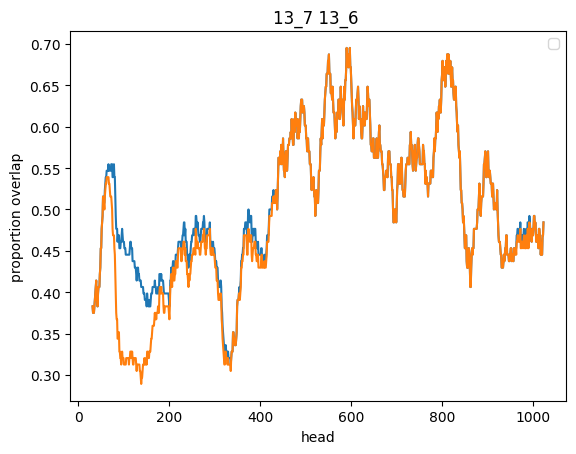

In [ ]:
groups = group_highly_correlated(df1.rolling(window=32).mean())
print(len([group for group in groups if len(group) > 1]))
'''num_plots = len(groups)
print(len(groups))
fig, axes = plt.subplots(, 1, figsize=(15, 5))'''


'''i=0
for values in groups[0:7]:
    ax = axes[i]  # Select the current subplot
    ax.plot(values)
    i += 1'''

'''fig, axes = plt.subplots(3, 6, figsize=(10, 15), sharex=True, sharey=True)

axes = axes.flatten()

i = 1
for group in groups:
    ax = axes[i-1]
    if len(group) > 1:
        df1.rolling(window=32).mean()[group.columns].plot(ax=ax, legend=False)
        title = ""
        for column in group.columns:
            title += column + " "
        ax.set_xlabel('head')
        ax.set_ylabel('proportion overlap')
        ax.set_title(f'Document {i}')
        i+=1
    #ax.get_legend().remove()


plt.tight_layout()
plt.show()'''

fig, axes = plt.subplots(3, 6, figsize=(10, 15), sharex=True, sharey=True)

for group in groups:
    if len(group.columns) > 1:
        plt.figure()
        plt.plot(group)
        title = ""
        for column in group.columns:
            title += column + " "
        plt.title(title)
        plt.xlabel('head')
        plt.ylabel('proportion overlap')
        plt.legend()



In [19]:
df2 = pd.read_csv('hyp2_comparisons.csv')

<Axes: >

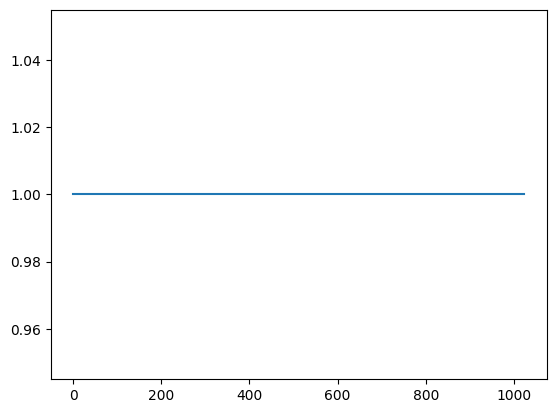

In [38]:
df2['10_134'].plot()

Text(0.5, 1.0, 'Hypothesis 2 Proportion Overlap')

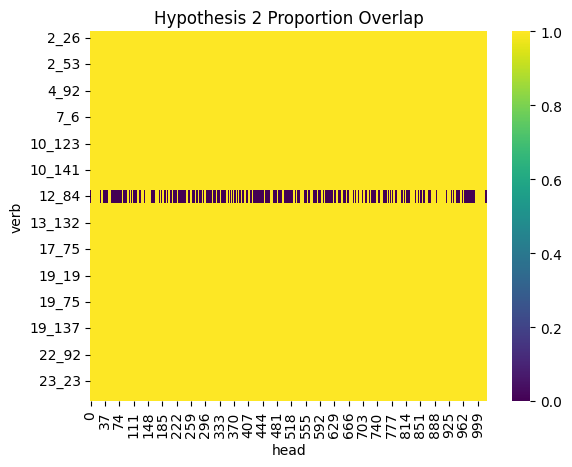

In [65]:
#df2_rolling = df2.rolling(window=32).mean()

ax = sns.heatmap(df2.T, annot=False, cmap='viridis')
ax.set_xlabel("head")
ax.set_ylabel("verb")
ax.set_title("Hypothesis 2 Proportion Overlap")